In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import sqrt
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('innercity.xlsx')
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [4]:
df.shape

(21613, 23)

In [5]:
print(f'total percentage of null value : {df.isnull().sum().sum()*100/df.shape[0]}')

total percentage of null value : 3.187896173599223


### DATA CLEANING

In [6]:
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df=df.dropna(axis=0,inplace=False)
df.drop(['cid'],axis=1,inplace=True)

In [9]:
df.shape

(21387, 22)

In [10]:
(df.dtypes)

dayhours             object
price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated          int64
zipcode               int64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

In [11]:
data=df.copy()
data.head()

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [12]:
data.shape

(21387, 22)

In [13]:
data['dayhours'] = pd.to_datetime(data.dayhours)

Categorical

In [14]:
print(f"Categorical  columns : >>{data.select_dtypes('object').columns.values}")

Categorical  columns : >>['ceil' 'coast' 'condition' 'yr_built' 'long' 'total_area']


In [15]:
data.select_dtypes('object').describe()

,ceil,coast,condition,yr_built,long,total_area
count,21387,21387,21387,21387,21387.00,21387
unique,7,3,5,116,753.00,11094
top,1,0,3,2014,-122.29,$
freq,10547,21197,13881,554,115.00,39


In [16]:
print('Length of Data Rows Haviing $ sign : ',len(set(np.where(data=='$')[0])))

Length of Data Rows Haviing $ sign :  99


In [17]:
for i in data.select_dtypes('object').columns :
  data = data.iloc[np.where(data[i]!='$')[0]]
data.shape

(21288, 22)

In [18]:
data['ceil']=data['ceil'].astype('category')
data['coast']=data['coast'].astype('category')
data['condition']=data['condition']	.astype('category')
data['total_area']=data['total_area'].astype('int')
data['long']=data['long'].astype(float)

In [19]:
data['yr_built']=data['yr_built'].astype('int')
current_year = datetime.datetime.now().year
data['age']=current_year-data['yr_built']

In [20]:
data.columns

Index(['dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'age'],
      dtype='object')

In [21]:
data.nunique()

dayhours              372
price                3599
room_bed               13
room_bath              29
living_measure       1035
lot_measure          9693
ceil                    6
coast                   2
sight                   5
condition               5
quality                12
ceil_measure          942
basement              305
yr_built              116
yr_renovated           70
zipcode                70
lat                  5022
long                  752
living_measure15      773
lot_measure15        8614
furnished               2
total_area          11072
age                   116
dtype: int64

### Continueus Variable

In [22]:
# con_features = ['price','living_measure','lot_measure','living_measure15', 'lot_measure15','total_area','ceil_measure','age']

In [23]:
# sns.pairplot(data[con_features])

In [24]:
# data[con_features].corr()['price'].sort_values(ascending=False)

In [25]:
data.corr()['price'].sort_values(ascending=False)

price               1.000000
living_measure      0.701352
quality             0.668567
ceil_measure        0.604303
living_measure15    0.586653
furnished           0.568530
room_bath           0.523339
sight               0.395860
basement            0.324347
room_bed            0.307878
lat                 0.307757
yr_renovated        0.125734
total_area          0.103581
lot_measure         0.088464
lot_measure15       0.081416
yr_built            0.054680
long                0.022102
zipcode            -0.053700
age                -0.054680
Name: price, dtype: float64

<li>'price' column have higher Correlation with 'living_measure' ,'living_measure15', 'ceil_measure'
<li>positive correlation b/w Price and Latitude.

In [26]:
# data[con_features].plot(kind='bar')

categorical varible

coast

In [27]:
print(data['coast'].value_counts())

0    21129
1      159
Name: coast, dtype: int64


In [28]:
print('avg price for house with water front : ',int(data[data['coast']==1]['price'].mean()))
print('avg price for house without water front : ',int(data[data['coast']==0]['price'].mean()))

avg price for house with water front :  1668782
avg price for house without water front :  531488


<li>coast with water beach view have higher price

<Axes: xlabel='condition', ylabel='Density'>

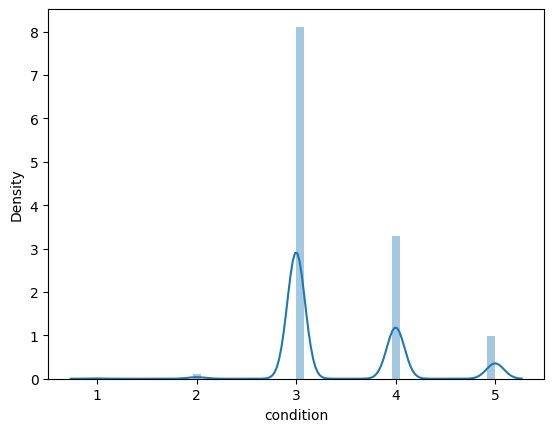

In [29]:
sns.distplot(data['condition'])

<Axes: xlabel='quality', ylabel='Density'>

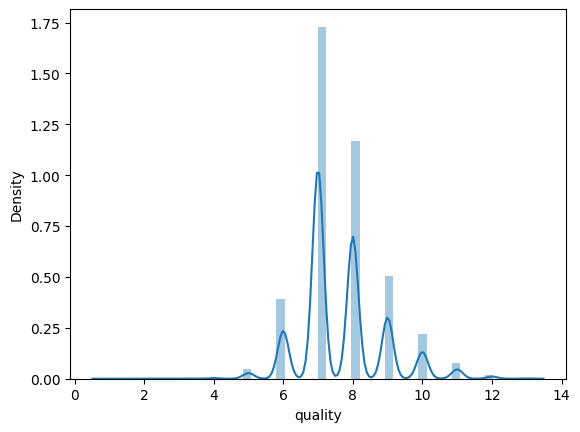

In [30]:
sns.distplot(data['quality'])

<Axes: xlabel='room_bath', ylabel='Density'>

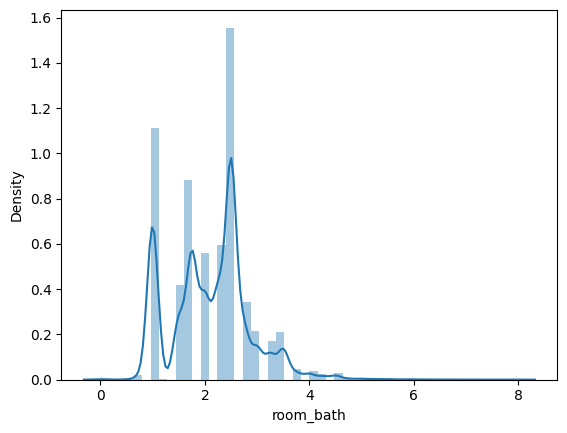

In [31]:
sns.distplot(data['room_bath'])

In [32]:
data = data.drop(['yr_built','sight','zipcode'],axis=1)

## Feature selection

In [33]:
X = data.drop(['price','dayhours'],axis=1)
y = data['price']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

### outliers Removed

In [35]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('Q3 : ',Q3,'\tQ1 : ',Q1)
print(f'IQR : {IQR}')
print(f'lower_range : {lower}\nhigh_range : {upper}')

Q3 :  645000.0 	Q1 :  321020.25
IQR : 323979.75
lower_range : -164949.375
high_range : 1130969.625


In [36]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = data[data['price']>=upper].index
lower_array = data[data['price']<=lower].index
print(upper_array.shape,lower_array.shape)
# Removing the outliers
clean = data.drop(index=upper_array, inplace=False,axis=1)
clean = clean.drop(index=lower_array, inplace=False,axis=1)

# Print the new shape of the DataFrame
print("old Shape: ", data.shape)
print("New Shape: ", clean.shape)

(1123,) (0,)
old Shape:  (21288, 20)
New Shape:  (20165, 20)


In [37]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(clean[X.columns],clean['price'],test_size=0.3,random_state=100)

## model

In [38]:
models = {'name':[],'rmse':[],'training_time':[],'prediction_time':[]}

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import time

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
ridge_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree=2)),
    ('lr_model',LinearRegression())
])


start = time.time()
ridge_clf.fit(X_train,y_train)
end = time.time()
t1 = end - start 
start = time.time()
pred = ridge_clf.predict(X_test)
end = time.time()
t2 = end - start 

print('with outliers rmse : ',sqrt(mean_squared_error(y_test,pred)))
models['name'].append(ridge_clf[2].__class__.__name__ + ' with outliers')
models['rmse'].append(sqrt(mean_squared_error(y_test,pred)))
models['training_time'].append(t1)
models['prediction_time'].append(t2)
# LinearRegression
ridge_clf1 = Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree=2)),
    ('lr_model',LinearRegression())
])
start = time.time()
ridge_clf1.fit(X_train1,y_train1)
end = time.time()
t1 = end - start 

start = time.time()
pred = ridge_clf1.predict(X_test1)
end = time.time()
t2 = end - start 

print('without outliers rmse : ',sqrt(mean_squared_error(y_test1,pred)))
models['name'].append(ridge_clf1[2].__class__.__name__ + ' without outliers')
models['rmse'].append(sqrt(mean_squared_error(y_test1,pred)))
models['training_time'].append(t1)
models['prediction_time'].append(t2)


with outliers rmse :  162912.53819226666
without outliers rmse :  102831.93534641631


In [41]:
from sklearn.tree import DecisionTreeRegressor
params = {'max_depth':[2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[2,3,4,5,6,7,8,9,10,11,12,13]}
dtree_clf = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params)
start = time.time()
dtree_clf.fit(X_train,y_train)
end = time.time()
t1 = end - start 

start = time.time()
pred = dtree_clf.predict(X_test)
end = time.time()
t2 = end - start 

print('best parameter :',dtree_clf.best_estimator_)
print('with outliers rmse : ',sqrt(mean_squared_error(y_test,pred)))
models['name'].append(dtree_clf.__class__.__name__ + ' with outliers')
models['rmse'].append(sqrt(mean_squared_error(y_test,pred)))
models['training_time'].append(t1)
models['prediction_time'].append(t2)

# DecisionTree
params = {'max_depth':[2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[2,3,4,5,6,7,8,9,10,11,12,13]}
dtree_clf1 = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params)
start = time.time()
dtree_clf1.fit(X_train1,y_train1)
end = time.time()
t1 = end - start 
start = time.time()
pred = dtree_clf1.predict(X_test1)
end = time.time()
t2 = end - start 

print('best parameter :',dtree_clf1.best_estimator_)
print('without outliers rmse : ',sqrt(mean_squared_error(y_test1,pred)))
models['name'].append(dtree_clf1.__class__.__name__ + ' without outliers')
models['rmse'].append(sqrt(mean_squared_error(y_test1,pred)))
models['training_time'].append(t1)
models['prediction_time'].append(t2)

best parameter : DecisionTreeRegressor(max_depth=6, max_leaf_nodes=13)
with outliers rmse :  213881.13300225997
best parameter : DecisionTreeRegressor(max_depth=6, max_leaf_nodes=13)
without outliers rmse :  120586.60618173638


In [42]:
from sklearn.ensemble import RandomForestRegressor
forest_clf = RandomForestRegressor(n_estimators=100)

start = time.time()
forest_clf.fit(X_train,y_train)
end = time.time()
t1 = end - start 

start = time.time()
pred = forest_clf.predict(X_test)
end = time.time()
t2 = end - start 

print('with outliers rmse : ',sqrt(mean_squared_error(y_test,pred)))
models['name'].append(forest_clf.__class__.__name__ + ' with outliers')
models['rmse'].append(sqrt(mean_squared_error(y_test,pred)))
models['training_time'].append(t1)
models['prediction_time'].append(t2)
# RandomForest
forest_clf1 = RandomForestRegressor(n_estimators=100)
start = time.time()
forest_clf1.fit(X_train1,y_train1)
end = time.time()
t1 = end - start 
start = time.time()
pred = forest_clf1.predict(X_test1)
end = time.time()
t2 = end - start 

print('without outliers rmse : ',sqrt(mean_squared_error(y_test1,pred)))
models['name'].append(forest_clf1.__class__.__name__ + ' without outliers')
models['rmse'].append(sqrt(mean_squared_error(y_test1,pred)))
models['training_time'].append(t1)
models['prediction_time'].append(t2)

with outliers rmse :  128383.71690309762
without outliers rmse :  78253.94151714598


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
grad_clf = GradientBoostingRegressor()
start = time.time()
grad_clf.fit(X_train,y_train)
end = time.time()
t1 = end - start 
start = time.time()
pred = grad_clf.predict(X_test)
end = time.time()
t2 = end - start 

print('with outliers rmse : ',sqrt(mean_squared_error(y_test,pred)))

models['name'].append(grad_clf.__class__.__name__ + ' with outliers')
models['rmse'].append(sqrt(mean_squared_error(y_test,pred)))
models['training_time'].append(t1)
models['prediction_time'].append(t2)
# Gradient Boosting
grad_clf1 = GradientBoostingRegressor()
start = time.time()
grad_clf1.fit(X_train1,y_train1)
end = time.time()
t1 = end - start 
start = time.time()
pred = grad_clf1.predict(X_test1)
end = time.time()
t2 = end - start 

print('without outliers rmse : ',sqrt(mean_squared_error(y_test1,pred)))
models['name'].append(grad_clf1.__class__.__name__ + ' without outliers')
models['rmse'].append(sqrt(mean_squared_error(y_test1,pred)))
models['training_time'].append(t1)
models['prediction_time'].append(t2)

with outliers rmse :  137633.5521871835
without outliers rmse :  84703.52080738376


In [44]:
from sklearn.svm import SVR
svr_clf = Pipeline([('scaler',StandardScaler()),('svr',SVR())])

start = time.time()
svr_clf.fit(X_train,y_train)
end = time.time()
t1 = end - start 
start = time.time()
pred = svr_clf.predict(X_test)
end = time.time()
t2 = end - start 
print('with outliers rmse : ',sqrt(mean_squared_error(y_test,pred)))
models['name'].append(svr_clf[1].__class__.__name__ + ' with outliers')
models['rmse'].append(sqrt(mean_squared_error(y_test,pred)))
models['training_time'].append(t1)
models['prediction_time'].append(t2)
# SVM
svr_clf1 = Pipeline([('scaler',StandardScaler()),('svr',SVR())])
start = time.time()
svr_clf1.fit(X_train1,y_train1)
end = time.time()
t1 = end - start 
start = time.time()
pred = svr_clf1.predict(X_test1)
end = time.time()
t2 = end - start 

print('without outliers rmse : ',sqrt(mean_squared_error(y_test1,pred)))
models['name'].append(svr_clf1[1].__class__.__name__ + ' without outliers')
models['rmse'].append(sqrt(mean_squared_error(y_test1,pred)))
models['training_time'].append(t1)
models['prediction_time'].append(t2)

with outliers rmse :  367244.0392823733
without outliers rmse :  207616.99625748387


In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('knn_model',KNeighborsRegressor()),
])

start = time.time()
knn_clf.fit(X_train,y_train)
end = time.time()
t1 = end - start 
start = time.time()
pred = knn_clf.predict(X_test)
end = time.time()
t2 = end - start 

print('with outliers rmse : ',sqrt(mean_squared_error(y_test,pred)))
models['name'].append(knn_clf[1].__class__.__name__ + ' with outliers')
models['rmse'].append(sqrt(mean_squared_error(y_test,pred)))
models['training_time'].append(t1)
models['prediction_time'].append(t2)

# KNN
knn_clf1 = Pipeline([
    ('scaler',StandardScaler()),
    ('knn_model',KNeighborsRegressor()),
])
start = time.time()
knn_clf1.fit(X_train1,y_train1)
end = time.time()
t1 = end - start 
start = time.time()
pred = knn_clf1.predict(X_test1)
end = time.time()
t2 = end - start 

print('without outliers rmse : ',sqrt(mean_squared_error(y_test1,pred)))
models['name'].append(knn_clf1[1].__class__.__name__ + ' without outliers')
models['rmse'].append(sqrt(mean_squared_error(y_test1,pred)))
models['training_time'].append(t1)
models['prediction_time'].append(t2)

with outliers rmse :  159765.8844139439
without outliers rmse :  98936.41073472814


test

In [46]:
pd.DataFrame(models)

,name,rmse,training_time,prediction_time
0,LinearRegression with outliers,162912.538192,0.188244,0.014015
1,LinearRegression without outliers,102831.935346,0.161443,0.015995
2,GridSearchCV with outliers,213881.133002,21.578320,0.007967
3,GridSearchCV without outliers,120586.606182,24.829332,0.000000
4,RandomForestRegressor with outliers,128383.716903,25.041929,0.186364
5,RandomForestRegressor without outliers,78253.941517,22.153972,0.176576
6,GradientBoostingRegressor with outliers,137633.552187,4.638266,0.016847
7,GradientBoostingRegressor without outliers,84703.520807,4.139157,0.016000
8,SVR with outliers,367244.039282,15.207876,10.849395
9,SVR without outliers,207616.996257,13.532840,12.000035
